In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = 299 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 0 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological distributions

In [ ]:
file_name = "High_School11"
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

In [ ]:
def comp_metric(graphs,metric):
    metric_dist = []
    for graph in graphs:
        metric_dist.append(metric(graph))
    return metric_dist

def compute_store_metrics(metrics,metrics_names,generator,file_name,graphs):
    for i in range(len(metrics)):
        metric = metrics[i]
        metric_name = metrics_names[i]
        met = comp_metric(graphs,metric)
        np.save("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/"+metric_name,met)
        
def compute_store_metrics_original(metrics,metrics_names,file_name,graphs):
    for i in range(len(metrics)):
        metric = metrics[i]
        metric_name = metrics_names[i]
        met = comp_metric([graphs],metric)
        np.save("topology_results/original_distributions/"+file_name+"/"+metric_name,met)
        

In [ ]:
metrics = [density,global_clustering,average_shortest_path,dist_number_of_individuals,
           dist_number_of_new_conversations,get_ass,s_metric,dist_frequency_of_interactions,
           dist_strength_of_nodes,dist_duration]
metrics_names = ["density","clust","asp","nb_interactions",
                   "new_con","ass","s_metric","interacting_indiv",
                   "streng","dur"]

In [ ]:
compute_store_metrics_original(metrics,metrics_names,file_name,orig_graphs)

In [ ]:
compute_store_metrics(metrics,metrics_names,
                      "etngen",
                      file_name,
                      etn_gen)

In [ ]:
compute_store_metrics(metrics,metrics_names,
                      "taggen",
                      file_name,
                      tag_gen)
compute_store_metrics(metrics,metrics_names,
                      "stmgen",
                      file_name,
                      stm_gen)
compute_store_metrics(metrics,metrics_names,
                      "dymgen",
                      file_name,
                      dym_gen)

# load distributions

In [16]:
labels

array(['Average shortest\npath length', 'Assortativity',
       'Global clustering \ncoefficient', 'Edge strength',
       'Duration of contacts', 'S-metric', 'New conversations',
       'Interacting\nindividuals', 'Density', 'Number of interactions'],
      dtype='<U30')

In [17]:
def load_topo_distributions(generator,file_name):
    
    den = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/density.npy",allow_pickle=True)
    clust = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/clust.npy",allow_pickle=True)
    asp = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/asp.npy",allow_pickle=True)
    nb_inter = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    new_conv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    ass = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/ass.npy",allow_pickle=True)
    s_met = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    stren = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/streng.npy",allow_pickle=True)
    durat = np.load("topology_results/"+generator+"/Multiple_run/distributions/"+file_name+"/dur.npy",allow_pickle=True)
    
    return asp,ass,clust,stren,durat,s_met,new_conv,inter_indiv,den,nb_inter

def load_topo_original(file_name):
    den = np.load("topology_results/original_distributions/"+file_name+"/density.npy",allow_pickle=True)
    clust = np.load("topology_results/original_distributions/"+file_name+"/clust.npy",allow_pickle=True)
    asp = np.load("topology_results/original_distributions/"+file_name+"/asp.npy",allow_pickle=True)
    nb_inter = np.load("topology_results/original_distributions/"+file_name+"/nb_interactions.npy",allow_pickle=True)
    new_conv = np.load("topology_results/original_distributions/"+file_name+"/new_con.npy",allow_pickle=True)
    ass = np.load("topology_results/original_distributions/"+file_name+"/ass.npy",allow_pickle=True)
    s_met = np.load("topology_results/original_distributions/"+file_name+"/s_metric.npy",allow_pickle=True)
    inter_indiv = np.load("topology_results/original_distributions/"+file_name+"/interacting_indiv.npy",allow_pickle=True)
    stren = np.load("topology_results/original_distributions/"+file_name+"/streng.npy",allow_pickle=True)
    durat = np.load("topology_results/original_distributions/"+file_name+"/dur.npy",allow_pickle=True)
    
    return asp,ass,clust,stren,durat,s_met,new_conv,inter_indiv,den,nb_inter


def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts

# example of calculating the kl divergence between two mass functions
from math import log2
 
# calculate the kl divergence
def kl_divergence_max(d2, d1):
    
    max_len = max(len(d1),len(d2))

    new_d1 = np.zeros(max_len)
    new_d1[:len(d1)] = d1

    new_d2 = np.zeros(max_len)
    new_d2[:len(d2)] = d2
    
    E = 0.0000001
    new_d1 = new_d1 + E
    new_d2 = new_d2 + E

    res = 0
    for i in range(max_len):
        d1 = new_d1[i]
        d2 = new_d2[i]
        
        if (d1 != 0) and (d2 != 0):
            res = res + (d1 * log2(d1/d2))
            
    return res

In [109]:
def compute_ks_all_metrics(nb_bins,file_name):
    res_etn = []
    res_tag = []
    res_stm = []
    res_dym = []
    o_in = load_topo_original(file_name)
    e_in = load_topo_distributions("etngen",file_name)
    t_in = load_topo_distributions("taggen",file_name)
    d_in = load_topo_distributions("dymgen",file_name)
    s_in = load_topo_distributions("stmgen",file_name)

    all_res = []
    for i in range(10):

        o = o_in[i]
        e = e_in[i]
        t = t_in[i]
        d = d_in[i]
        s = s_in[i]

        #if i == 1 or i == 5 or i == 6:
        biggest_dist = o[0]
        #else:
        #biggest_dist = np.max(t)

        tc,tranges = np.histogram(biggest_dist,bins=nb_bins)

        oc = compute_counts(tranges,o)
        ec = compute_multpile_counts(tranges,e)
        dc = compute_multpile_counts(tranges,d)
        tc = compute_multpile_counts(tranges,t)
        sc = compute_multpile_counts(tranges,s)


        oc = oc/np.sum(oc)
        ec = [np.array(x)/sum(x) for x in ec]
        dc = [np.array(x)/sum(x) for x in dc]
        tc = [np.array(x)/sum(x) for x in tc]
        sc = [np.array(x)/sum(x) for x in sc]



        ec_kl = []
        tc_kl = []
        sc_kl = []
        dc_kl = []
        for i in ec:
            ec_kl.append(kl_divergence_max(i,oc))
        for i in tc:
            tc_kl.append(kl_divergence_max(i,oc))
        for i in dc:
            dc_kl.append(kl_divergence_max(i,oc))
        for i in sc:
            sc_kl.append(kl_divergence_max(i,oc))


        maximum_for_nome = max(np.nanmax(ec_kl),np.nanmax(tc_kl),np.nanmax(sc_kl),np.nanmax(dc_kl))
        ec_kl = ec_kl/maximum_for_nome
        tc_kl = tc_kl/maximum_for_nome
        sc_kl = sc_kl/maximum_for_nome
        dc_kl = dc_kl/maximum_for_nome

        res = [[np.nanmean(ec_kl),np.nanstd(ec_kl)],[np.nanmean(tc_kl),np.nanstd(tc_kl)],
               [np.nanmean(sc_kl),np.nanstd(sc_kl)],[np.nanmean(dc_kl),np.nanstd(dc_kl)]]
        
        res_etn.append([np.nanmean(ec_kl),np.nanstd(ec_kl)])
        res_tag.append([np.nanmean(tc_kl),np.nanstd(tc_kl)])
        res_stm.append([np.nanmean(sc_kl),np.nanstd(sc_kl)])
        res_dym.append([np.nanmean(dc_kl),np.nanstd(dc_kl)])

        if False:
            plt.figure(figsize=(15,5))
            plt.subplot(1,5,1)
            plt.bar(range(nb_bins),oc)
            plt.title("orig")
            plt.subplot(1,5,2)
            plt.bar(range(nb_bins),ec[0])
            plt.title("etn\n"+str(res[0])[0:5])
            plt.subplot(1,5,3)
            plt.bar(range(nb_bins),tc[0])
            plt.title("tag\n"+str(res[1])[0:5])
            plt.subplot(1,5,4)
            plt.bar(range(nb_bins),sc[0])
            plt.title("stm\n"+str(res[2])[0:5])
            plt.subplot(1,5,5)
            plt.bar(range(nb_bins),dc[0])
            plt.title("diam\n"+str(res[3])[0:5])
            plt.show()

        #res2 = []

        #ooo = o[0]/np.sum(o[0])
        #eee = e[0]/np.sum(e[0])
        #ttt = t[0]/np.sum(t[0])
        #sss = s[0]/np.sum(s[0])
        #ddd = d[0]/np.sum(d[0])

        #res2.append(kl_divergence_max(ooo,eee))
        #res2.append(kl_divergence_max(ooo,ttt))
        #res2.append(kl_divergence_max(ooo,sss))
        #res2.append(kl_divergence_max(ooo,ddd))
        #if False:
        #    plt.figure(figsize=(15,5))
        #    plt.subplot(1,5,1)
        #    plt.hist(o[0],bins=10)
        #    plt.title("orig")
        #    plt.subplot(1,5,2)
        #    plt.hist(e[0],bins=10)
        #    plt.title("etn\n"+str(res2[0])[0:5])
        #    plt.subplot(1,5,3)
        #    plt.hist(t[0],bins=10)
        #    plt.title("tag\n"+str(res2[1])[0:5])
        #    plt.subplot(1,5,4)
        #    plt.hist(s[0],bins=10)
        #    plt.title("stm\n"+str(res2[2])[0:5])
        #    plt.subplot(1,5,5)
        #    plt.hist(d[0],bins=10)
        #    plt.title("diam\n"+str(res2[3])[0:5])
        #    plt.show()

    return [np.array(res_etn),np.array(res_tag),np.array(res_stm),np.array(res_dym)]

In [112]:


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1.5

In [113]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]

tmp = np.array(tmp)

In [115]:
labels = tmp[idx]

<ipython-input-109-b439b330c2a3>:37: RuntimeWarning: invalid value encountered in true_divide
  dc = [np.array(x)/sum(x) for x in dc]
<ipython-input-116-34fe7df1eebd>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


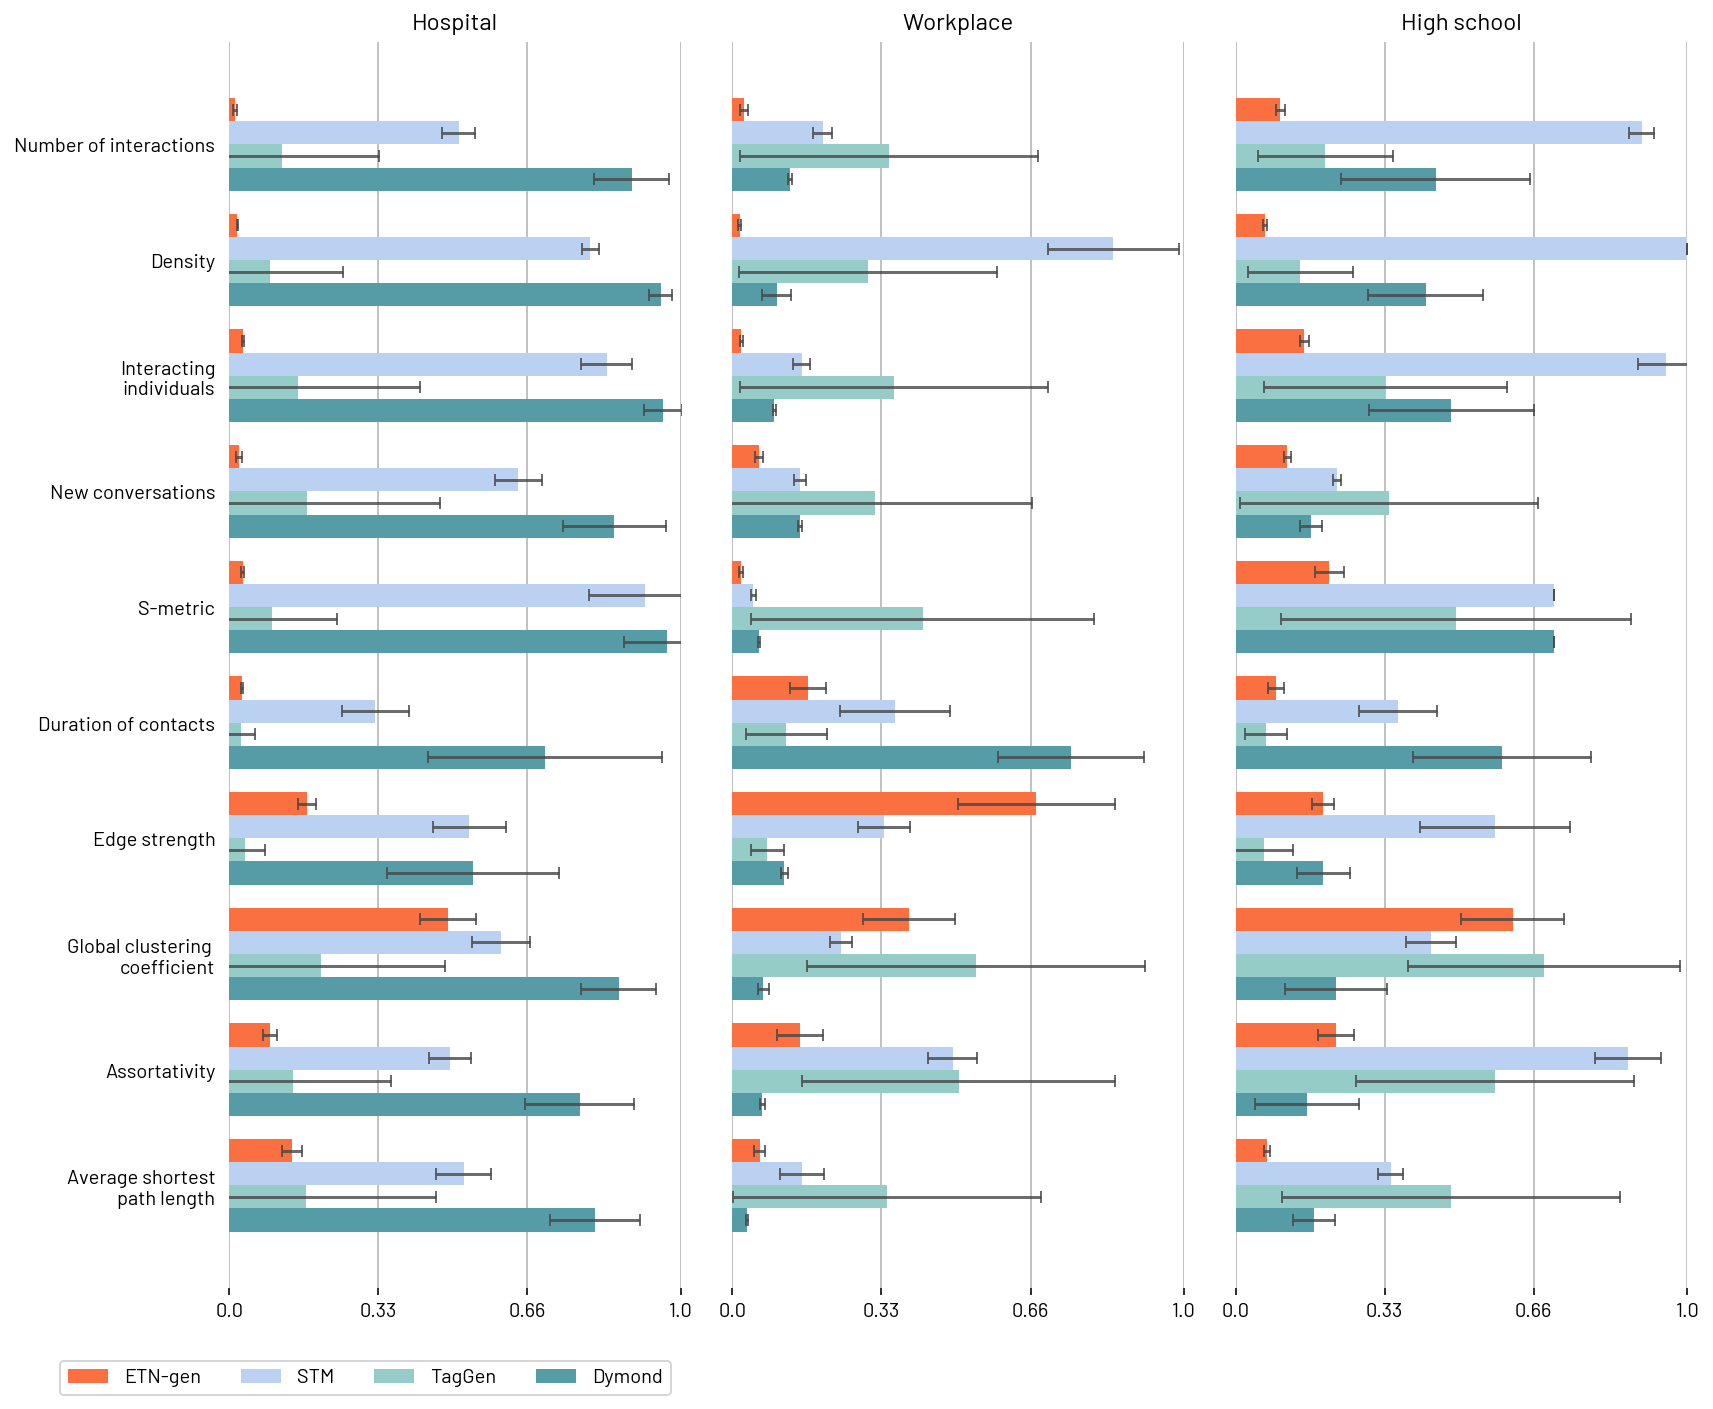

In [116]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
nb_bins = 50


x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"LH10")


x = np.arange(10)  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)

ax[0].title.set_text("Hospital")
rects1 = ax[0].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[0].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[0].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[0].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)



x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"InVS13")
ax[1].title.set_text("Workplace")

rects1 = ax[1].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[1].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[1].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[1].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


x1,x2,x3,x4 = compute_ks_all_metrics(nb_bins,"High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].barh(x + 0.3, x1[:,0], width, xerr=x1[:,1],label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
rects2 = ax[2].barh(x + 0.1, x2[:,0], width, xerr=x2[:,1],label='STM',color=STM_COLOR, error_kw=error_bar_style)
rects3 = ax[2].barh(x - 0.1, x3[:,0], width, xerr=x3[:,1],label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
rects4 = ax[2].barh(x - 0.3, x4[:,0], width, xerr=x4[:,1],label='Dymond',color=DYM_COLOR,error_kw=error_bar_style)


ax[0].set_yticklabels(labels)
ax[0].set_yticks(x)
ax[0].set_xlim(0,1)

ax[1].set_yticks(x)
ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
ax[1].set_xlim(0,1)

ax[2].set_yticks(x)
ax[2].set_xlim(0,1)
ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

ax[2].set_xticks([0,0.33,0.66,1])
ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[1].set_xticks([0,0.33,0.66,1])
ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
ax[0].set_xticks([0,0.33,0.66,1])
ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


ax[0].tick_params(bottom=True, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].xaxis.grid(True, color='#b3b3b3')
ax[0].yaxis.grid(False)

ax[1].tick_params(bottom=True, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].xaxis.grid(True, color='#b3b3b3')
ax[1].yaxis.grid(False)

ax[2].tick_params(bottom=True, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].xaxis.grid(True, color='#b3b3b3')
ax[2].yaxis.grid(False)



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)


ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)


ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(1, -0.05))

fig.tight_layout()
plt.savefig("topology_main_kld_test1.pdf", bbox_inches = 'tight')
plt.show()